In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/lukas/Code/histfactory/pyhf/venv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['source', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [90]:
import pyhf
reload(pyhf)
from pyhf import hfpdf
def prep_data(source):
    spec = {
        'signal': {
            'data': source['bindata']['sig'],
            'mods': [
                {
                    'name': 'mu',
                    'type': 'normfactor',
                    'data': None
                }
            ]
        },
        'background': {
            'data': source['bindata']['bkg'],
            'mods': [
                {
                    'name': 'bkg_norm',
                    'type': 'histosys',
                    'data': {
                        'lo_hist': source['bindata']['bkgsys_dn'],
                        'hi_hist': source['bindata']['bkgsys_up'],
                    }
                }
            ]
        }
    }
    pdf  = hfpdf(spec)
    data = source['bindata']['data'] + pdf.auxdata
    return data, pdf

In [91]:
source = {
  "binning": [2,-0.5,1.5],
  "bindata": {
    "data":    [120.0, 180.0],
    "bkg":     [100.0, 150.0],
    "bkgsys_up":  [102, 190],
    "bkgsys_dn":  [98, 100],
    "sig":     [30.0, 95.0]
  }
}

d,pdf = prep_data(source)
init_pars = [0.0,0.0]
par_bounds = [[0,10],[-5,5]]

print d

[120.0, 180.0, 0]


{'exp': [0.3111465066837988,
  0.42267218014242197,
  0.6105043598112219,
  0.8773491697915375,
  1.2116148902149564],
 'obs': 1.1161739895338065}

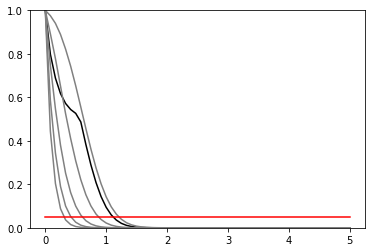

In [92]:
def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

def CLsOnePoint(muTest,d,pdf, init_pars,par_bounds):
    clsobs, cls_exp = pyhf.runOnePoint(muTest, d,pdf,init_pars,par_bounds)[-2:]
    return 1./clsobs, [1./x for x in cls_exp]

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross


CLsOnePoint(1.0,d,pdf,init_pars,par_bounds)


mutests = np.linspace(0,5,61)
tests = [CLsOnePoint(muTest,d,pdf,init_pars,par_bounds) for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]
plot_results(mutests, cls_obs, cls_exp)
invert_interval(mutests, cls_obs, cls_exp)
